In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model


In [7]:
data_train = pd.read_csv('wk3_kc_house_train_data.csv')
data_valid = pd.read_csv('wk3_kc_house_valid_data.csv')
data_test = pd.read_csv('wk3_kc_house_test_data.csv')
data_set1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
data_set2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
data_set3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
data_set4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [8]:
data_train = data_train.sort_values(by='sqft_living', ascending=True)
data_valid = data_valid.sort_values(by='sqft_living', ascending=True)
data_test = data_test.sort_values(by='sqft_living', ascending=True)

In [9]:
def get_numpy_data(data_sframe, features_name, output_name):
    data_sframe['constant'] = 1 # add a constant column to an SFrame
    features_matrix = data_sframe[ (['constant'] + features_name) ].values
    output_array = data_sframe[output_name].values
    return(features_matrix, output_array)

In [10]:
def predict_output(feature_matrix, weights):
    predictions = feature_matrix.dot(weights)
    return(predictions)

In [38]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    if (feature_is_constant):
#         print('0')
        derivative = (-2)*np.sum(errors * feature)
    else:
#         print(l2_penalty)
        derivative = (-2)*np.sum(errors * feature) + 2*l2_penalty*weight
    return derivative

In [66]:
(example_features, example_output) = get_numpy_data(data_train, ['sqft_living'], 'price')
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights)
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print( feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False) )
print( np.sum(errors*example_features[:,1])*2+20. )
print( '' )

# next two lines should print the same values
print( feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True) )
print( np.sum(errors)*2. )

25934595330656.0
-25934595330616.0

10187879964.0
-10187879964.0


In [54]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    errors = -predict_output(feature_matrix, weights) + output
    mse = list(range(max_iterations))
    for k in range(max_iterations):
        for i in range(len(weights)): # loop over each weight
            derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, i==0 )
            weights[i] = weights[i] - step_size*derivative
#         print('errors:', errors)
#         print('weights:', weights)
        mse[k] = sklearn.metrics.mean_squared_error(output, predict_output(feature_matrix, weights))
#         print('mse:', mse)
    return weights, mse

In [55]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(data_train, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(data_test, simple_features, my_output)

In [56]:
print(simple_feature_matrix.shape)
print(output.shape)
print(simple_test_feature_matrix.shape)
print(test_output.shape)

(9761, 2)
(9761,)
(2217, 2)
(2217,)


In [57]:
step_size = 1e-12
max_iterations = 1000
initial_weights = [0.0,0.0]

In [61]:
simple_weights_0_penalty, mse0 = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0, max_iterations)

In [62]:
simple_weights_0_penalty

array([1.05952717e+01, 2.69525250e+04])

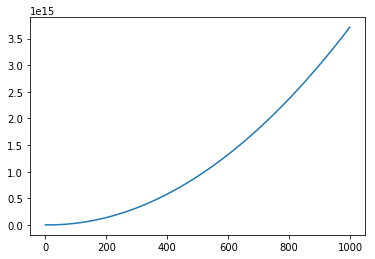

In [63]:
plt.plot(mse0)

In [327]:
predict_output(simple_test_feature_matrix, simple_weights_0_penalty)

array([5.66003554e+06, 7.41194967e+06, 7.54671229e+06, ...,
       8.59785600e+07, 9.59509942e+07, 1.05788666e+08])

In [328]:
len(test_output)*sklearn.metrics.mean_squared_error(test_output, predict_output(simple_test_feature_matrix, simple_weights_0_penalty))

1.975424572157632e+18

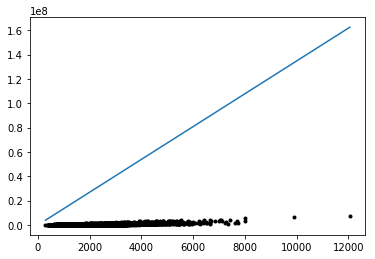

In [329]:
plt.plot(simple_feature_matrix[:,1], output,'k.')
plt.plot(simple_feature_matrix[:,1], predict_output(simple_feature_matrix, simple_weights_0_penalty))

In [186]:
simple_weights_high_penalty, msehigh = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, 1000)

In [187]:
simple_weights_high_penalty

array([ 10.59527173, 134.76262489])

In [190]:
predict_output(simple_test_feature_matrix, simple_weights_high_penalty)

array([  56610.89772498,   74130.03896051,   75477.6652094 , ...,
        859796.14206163,  959520.48447927, 1057897.20064802])

In [191]:
len(test_output)*sklearn.metrics.mean_squared_error(test_output, predict_output(simple_test_feature_matrix, simple_weights_high_penalty))

330209413995466.8

3.3*10^14

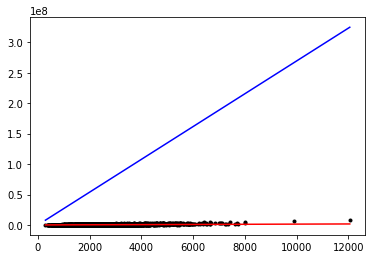

In [224]:
plt.plot(simple_feature_matrix[:,1],output,'k.',
        simple_feature_matrix[:,1],predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix[:,1],predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [205]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(data_train, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(data_test, model_features, my_output)

In [206]:
step_size = 1e-12
max_iterations = 1000
initial_weights = [0.0, 0.0, 0.0]

In [207]:
multiple_weights_0_penalty, mse0 = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0, 1000)

In [208]:
multiple_weights_0_penalty

array([1.05952717e+01, 2.69525250e+04, 2.40873989e+04])

In [213]:
len(test_output)*sklearn.metrics.mean_squared_error(test_output, predict_output(test_feature_matrix, multiple_weights_0_penalty))

2.6801698276540064e+19

In [214]:
predict_output(test_feature_matrix, multiple_weights_0_penalty)

array([4.55241775e+07, 4.13200381e+07, 4.64070431e+07, ...,
       2.45182813e+08, 2.74762641e+08, 3.61160079e+08])

In [216]:
test_output

array([ 280000.,  188000.,  299000., ..., 1822500.,  900000., 2700000.])

In [210]:
multiple_weights_high_penalty, mse0 = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, 1000)

In [211]:
multiple_weights_high_penalty

array([ 10.59527173, 134.76262489, 120.43699441])

In [212]:
len(test_output)*sklearn.metrics.mean_squared_error(test_output, predict_output(test_feature_matrix, multiple_weights_high_penalty))

153815924559516.47

In [215]:
predict_output(test_feature_matrix, multiple_weights_high_penalty)

array([ 227631.42978996,  206610.73281367,  232045.75794495, ...,
       1225924.60507399, 1373823.74525641, 1805810.93594629])

# key:

16952.5,no
134.8,no
l2=0,yes

2e14~5e14,no
16952.5,no
134.8,no

8e13~2e14,no
high,no

# key:

263.0,1
124.6,1
l2=0,yes

8e13~8e14,0
243.1,1
91.5,1

5e14,1
0,0

In [79]:
a = [1,2,3,2,3,11,4,2]

In [133]:
a

[12, 23, 222]

In [140]:
a[[0,1]]

TypeError: list indices must be integers or slices, not list

In [144]:
a[0:0]

[]

In [122]:
a.copy()

[12, 23, 222]

In [123]:
a = [23,12,222]
b = a.sort().copy()

AttributeError: 'NoneType' object has no attribute 'copy'